In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import requests 

In [3]:
df =  pd.read_csv("../Project_1_5/inequality_data.csv",encoding="iso-8859-1")
df.head()

,Country,Subregion,Region,UN R,UN P,CIA R,CIA P4,World Bank Gini %,Year,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Albania,Southern Europe,Europe,7.2,4.2,7.2,2004.0,29.4,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,Northern Africa,Africa,9.6,4.0,9.6,1995.0,27.6,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,Middle Africa,Africa,NaN,9.0,NaN,NaN,51.3,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,South America,Americas,31.6,8.8,35.0,2007.0,40.7,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Armenia,Western Asia,Asia,8.0,5.0,25.8,2004.0,27.9,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
new_df=df.iloc[:, :-9]
new_df.head()

,Country,Subregion,Region,UN R,UN P,CIA R,CIA P4,World Bank Gini %,Year
0,Albania,Southern Europe,Europe,7.2,4.2,7.2,2004.0,29.4,2020.0
1,Algeria,Northern Africa,Africa,9.6,4.0,9.6,1995.0,27.6,2011.0
2,Angola,Middle Africa,Africa,NaN,9.0,NaN,NaN,51.3,2018.0
3,Argentina,South America,Americas,31.6,8.8,35.0,2007.0,40.7,2022.0
4,Armenia,Western Asia,Asia,8.0,5.0,25.8,2004.0,27.9,2022.0


In [5]:
NaN_df = new_df[new_df.isnull().any(axis=1)]
NaN_df.head()

,Country,Subregion,Region,UN R,UN P,CIA R,CIA P4,World Bank Gini %,Year
2,Angola,Middle Africa,Africa,NaN,9.0,NaN,NaN,51.3,2018.0
7,Azerbaijan,Western Asia,Asia,9.7,NaN,9.5,2001.0,26.6,2005.0
11,Belize,Central America,Americas,28.8,NaN,19.9,2013.0,53.3,1999.0
13,Bhutan,Southern Asia,Asia,NaN,6.6,NaN,NaN,28.5,2022.0
16,Botswana,Southern Africa,Africa,43.0,15.0,NaN,NaN,53.3,2015.0


In [6]:
len(NaN_df)

56

In [7]:
clean_df = new_df.dropna()
clean_df

,Country,Subregion,Region,UN R,UN P,CIA R,CIA P4,World Bank Gini %,Year
0,Albania,Southern Europe,Europe,7.2,4.2,7.2,2004.0,29.4,2020.0
1,Algeria,Northern Africa,Africa,9.6,4.0,9.6,1995.0,27.6,2011.0
3,Argentina,South America,Americas,31.6,8.8,35.0,2007.0,40.7,2022.0
4,Armenia,Western Asia,Asia,8.0,5.0,25.8,2004.0,27.9,2022.0
5,Australia,"Australia, New Zealand",Oceania,12.5,6.3,12.7,1994.0,34.3,2018.0
...,...,...,...,...,...,...,...,...,...
161,United States,Northern America,Americas,18.5,9.4,14.0,2014.0,39.8,2021.0
162,Uruguay,South America,Americas,11.8,7.8,17.9,2003.0,40.6,2022.0
164,Venezuela,South America,Americas,18.8,15.8,50.3,2003.0,44.8,2006.0
165,Vietnam,South-eastern Asia,Asia,6.9,6.2,10.0,2004.0,36.1,2022.0


In [8]:
row_count = len(df)
row_count

170

In [9]:
gini_df = clean_df.iloc[:,[0,7,8]]
gini_df

,Country,World Bank Gini %,Year
0,Albania,29.4,2020.0
1,Algeria,27.6,2011.0
3,Argentina,40.7,2022.0
4,Armenia,27.9,2022.0
5,Australia,34.3,2018.0
...,...,...,...
161,United States,39.8,2021.0
162,Uruguay,40.6,2022.0
164,Venezuela,44.8,2006.0
165,Vietnam,36.1,2022.0


In [10]:
# filter two dataframes 

cgd =gini_df.query('Year == 2021')

In [11]:
#look for uniqyue countries NUNIQUE 
cgd["Country"].nunique()

47

In [12]:
cgd = cgd.iloc[:,[0,1]].copy()
cgd["Country"] = cgd["Country"].astype(str)
cgd["Year"] = 2021
cgd = cgd.loc[:,["Country","Year","World Bank Gini %"]]
cgd.head()

,Country,Year,World Bank Gini %
6,Austria,2021,30.7
10,Belgium,2021,26.6
12,Benin,2021,34.4
14,Bolivia,2021,40.9
18,Bulgaria,2021,39.0


Merge two dataframes


In [13]:
happy_data = pd.read_csv("../Project_1_5/whr24.droppednull.csv",encoding="iso-8859-1")
happy_data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2118,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2119,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2120,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2121,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


In [14]:
clean_happy_data = happy_data.query('year == 2021')
clean_happy_data= clean_happy_data.rename(columns={'Country name':'Country', "year": "Year"})
chd =clean_happy_data.iloc[:, :-8]
chd["Country"] = chd["Country"].astype(str)
chd.head()

,Country,Year,Life Ladder
12,Afghanistan,2021,2.436
26,Albania,2021,5.255
35,Algeria,2021,5.217
56,Argentina,2021,5.908
73,Armenia,2021,5.301


In [15]:
cgd.reset_index(drop=True,inplace=True)
chd.reset_index(drop=True,inplace=True)
chd['Country']=chd['Country'].str.strip()
cgd['Country']=cgd['Country'].str.strip()


In [110]:
merged_df = pd.merge(chd, cgd, how='left', on= ['Country', 'Year'])
merged_df = merged_df.dropna()
merged_df = merged_df.reset_index(drop=True)
rc = ["Hungary", "Philippines", "Kazakhstan"]
merged_df = merged_df[~merged_df["Country"].isin(rc)].reset_index(drop=True)
merged_df.head() 



,Country,Year,Life Ladder,World Bank Gini %
0,Austria,2021,7.080,30.7
1,Belgium,2021,6.882,26.6
2,Benin,2021,4.493,34.4
3,Bolivia,2021,5.569,40.9
4,Bulgaria,2021,5.422,39.0


Scatterplot 

In [105]:
country_list=merged_df["Country"].unique().tolist()

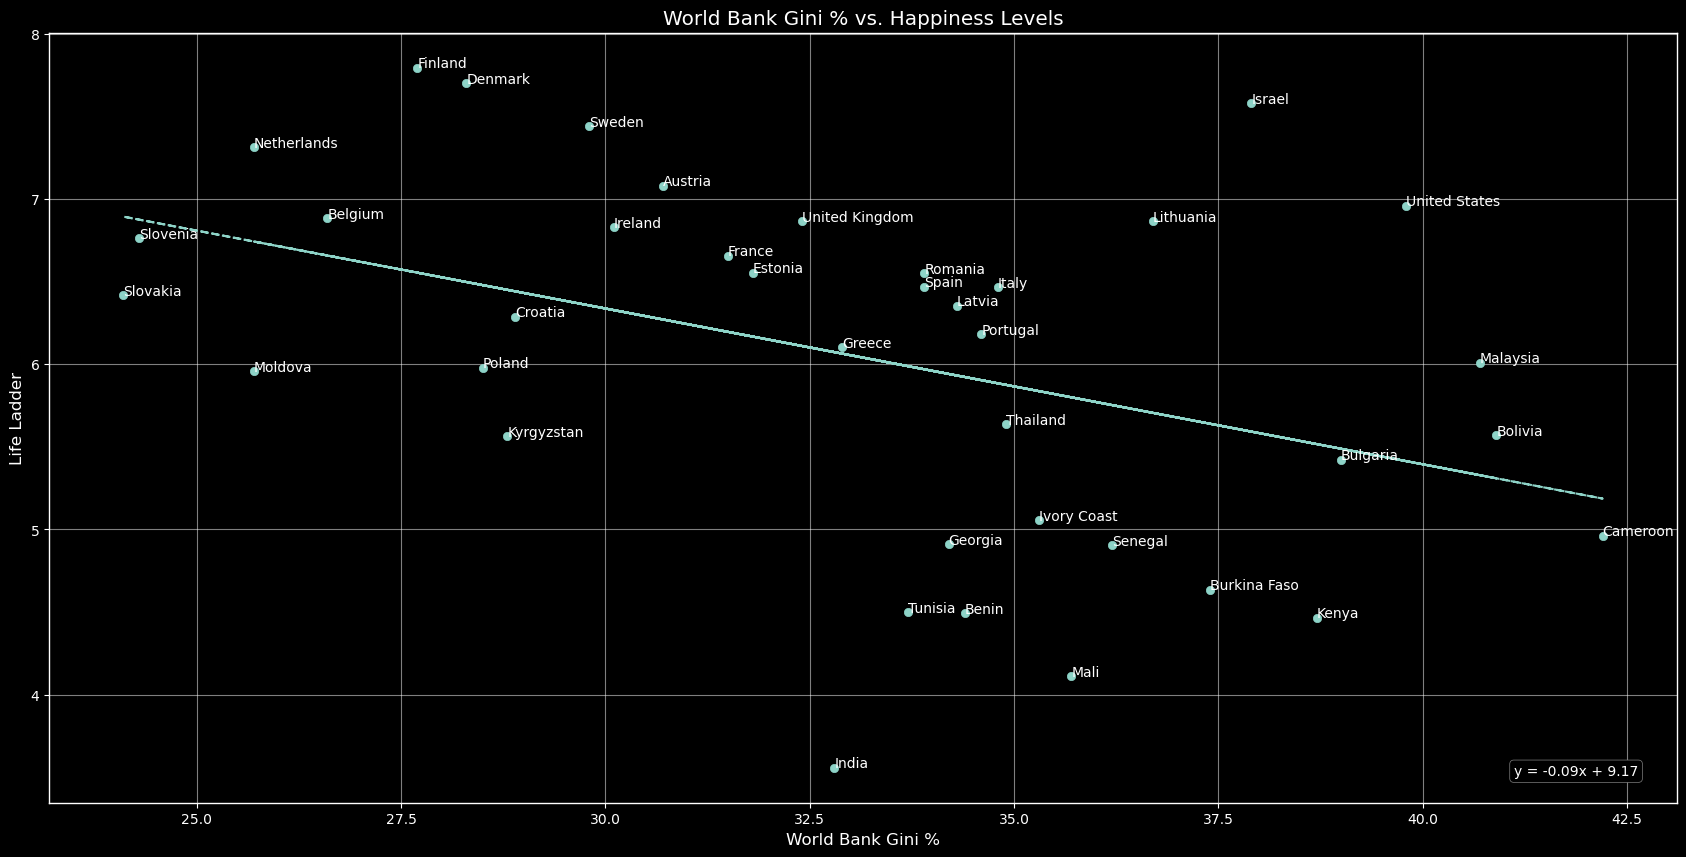

In [109]:
plt.scatter(merged_df["World Bank Gini %"], merged_df["Life Ladder"])
slope, int,r,p,std=st.linregress(merged_df["World Bank Gini %"], merged_df["Life Ladder"])
line_fit = slope*merged_df["World Bank Gini %"]+int
equation = f"y = {slope:.2f}x + {int:.2f}"
# Label the points
y = merged_df["Life Ladder"]
x= merged_df["World Bank Gini %"]

for i, label in enumerate(country_list):
    plt.annotate(label, (x[i], y[i]))

plt.plot(merged_df["World Bank Gini %"], line_fit,"--")
plt.style.use('dark_background')
plt.rcParams.update({'font.size':10})
plt.gcf().set_size_inches((21, 10))
plt.title("World Bank Gini % vs. Happiness Levels")
plt.xlabel("World Bank Gini %")
plt.ylabel("Life Ladder")
plt.grid(True, alpha= 0.5)
plt.annotate(equation, xy=(.9,.05), xycoords='axes fraction', fontsize=10,
                 ha='left', va='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='black'))
plt.savefig("World Bank Gini % vs. Happiness Levels.png")
plt.show()


0.007228414635648272